In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.tree import plot_tree
import seaborn as sb
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from matplotlib.ticker import FormatStrFormatter
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import tensorflow
import eli5

In [2]:
# Try different encodings
encodings = ['utf-8', 'latin1', 'cp1252', 'utf-16']
for encoding in encodings:
    try:
        df = pd.read_csv('Seoul DBPs wos1.csv', encoding=encoding)
        print(f'Successfully read with encoding: {encoding}')
        break  # Exit loop if successful
    except Exception as e:
        print(f'Failed to read with encoding {encoding}: {e}')

sample = df
sample['THMs'] = sample['THMs']*1000
sample['HAAs'] = sample['HAAs']*1000
sample['HANs'] = sample['HANs']*1000
sample['CH'] = sample['CH']*1000
sample['COD'] = sample['KMnO']*2.667

# Convert 'date' column to datetime format with the specified format
sample['date'] = pd.to_datetime(sample['date'], format="%d/%m/%y", dayfirst=True)
sample

Successfully read with encoding: utf-8


,order,year,month,date,season,location,type1,type,tempW,distance,...,CH,DBAN,DCAN,TCAN,HAAs,HANs,address1,Longitude,Latitude,COD
0,2,2024,9,2024-09-25,Autumn,GB,0,DWTP,30.3,0.0,...,0.7,0.0005,0.0000,0,0.0,0.0,??????????,127.184416,37.594685,1.8669
1,3,2024,9,2024-09-25,Autumn,GB,1,Tap,26.4,9.1,...,2.1,0.0005,0.0007,0,3.0,3.0,??????????????6??33,127.031167,37.659777,2.1336
2,4,2024,9,2024-09-25,Autumn,GB,2,Tank,26.8,11.3,...,2.4,0.0006,0.0007,0,3.0,3.0,????????????160-1,127.031707,37.634890,1.8669
3,6,2024,9,2024-09-25,Autumn,YD,0,DWTP,28.0,0.0,...,0.9,0.0000,0.0000,0,1.0,1.0,????????????,126.884068,37.547564,2.1336
4,7,2024,9,2024-09-25,Autumn,YD,1,Tap,27.6,5.1,...,2.8,0.0005,0.0009,0,5.0,5.0,????????????335,126.840504,37.569234,3.2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,954,2014,10,2014-10-07,Autumn,GU,1,Tap,21.1,1.0,...,1.4,0.0000,0.0009,0,5.0,0.9,?????? ?????? 248-24,127.103095,37.546860,2.1336
716,955,2014,10,2014-10-07,Autumn,GU,2,Tank,21.9,1.0,...,1.8,0.0000,0.0009,0,3.0,0.9,?????? ?????? 582,127.099562,37.543179,1.8669
717,957,2014,10,2014-10-07,Autumn,DD,0,DWTP,20.5,0.0,...,1.8,0.0000,0.0010,0,5.0,1.0,??????????,127.041943,37.540263,2.9337
718,958,2014,10,2014-10-07,Autumn,DD,1,Tap,21.0,7.0,...,4.0,0.0000,0.0020,0,7.0,2.0,???? ?????? 372-69,127.011694,37.552073,3.7338


In [3]:
sample.dtypes

order                 int64
year                  int64
month                 int64
date         datetime64[ns]
season               object
location             object
type1                 int64
type                 object
tempW               float64
distance            float64
tempA               float64
rainfall            float64
KMnO                float64
pH                  float64
Turb                float64
FreeCl              float64
THMs                float64
CHCl3               float64
BDCM                float64
DBCM                float64
CH                  float64
DBAN                float64
DCAN                float64
TCAN                  int64
HAAs                float64
HANs                float64
address1             object
Longitude           float64
Latitude            float64
COD                 float64
dtype: object

In [5]:
# Define features and target
date_df = pd.DataFrame(data=sample, columns=['year', 'month', 'date'])
norm_df1 = pd.DataFrame(data=sample, columns=['tempW', 'pH', 'Turb', 'distance', 'FreeCl', 'COD', 'THMs', 'HAAs', 'CH', 'HANs'])

# Concatenate date and feature data
norm_df = pd.concat([date_df, norm_df1], axis=1, ignore_index=False)
data = norm_df

In [4]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Select features (independent variables) and target (dependent variable)
X1 = data.loc[:, ['month', 'year', 'tempW', 'pH', 'FreeCl', 'distance', 'COD']]
y1 = data['CH']

# Create the training set with data before 2023
train_mask = data['year'] < 2023  # Use data before 2023 for training
X_train = X1[train_mask]
y_train = y1[train_mask]

# Create the test set with data for 2023 and 2024
test_mask = data['year'] >= 2023  # Use data from 2023 and 2024 for testing/prediction
X_test = X1[test_mask]
y_test = y1[test_mask]

# Optional: Reset the index if needed
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Initialize Random Forest Regressor
rf1 = RandomForestRegressor(n_estimators=100, random_state=2)

# Train the model with data before 2023
rf1.fit(X_train, y_train)

# Make predictions on the test set (2023 and 2024)
y_pred = rf1.predict(X_test)

# Calculate the R-squared, MSE, and MAE values for the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the performance metrics
print("Random Forest")
print(f'{r2:.3f}')
print(f'{mse:.3f}')
print(f'{mae:.3f}')

Random Forest
0.505
0.309
0.429


    Feature  Importance
3        pH    0.046843
6       COD    0.095046
0     month    0.095579
2     tempW    0.127162
1      year    0.139909
4    FreeCl    0.172735
5  distance    0.322727


C:\Users\jija8\AppData\Local\Temp\ipykernel_39148\1095924978.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Importance', y='Feature', data=importance_df, palette='Reds', orient='h')


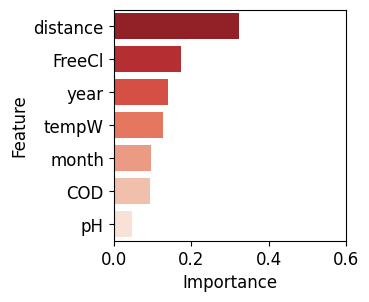

In [170]:
# Extract the feature importances
importances = rf1.feature_importances_

# Create a DataFrame for better handling of labels
importance_df = pd.DataFrame({
    'Feature': X1.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

print(importance_df)
plt.rcParams.update({'font.size': 12})

# Plot the feature importance
plt.figure(figsize=(3, 3))
sb.barplot(x='Importance', y='Feature', data=importance_df, palette='Reds', orient='h')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xlim(0, 0.6)
#plt.title('THMs vs. Feature Importance')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

C:\Users\jija8\AppData\Local\Temp\ipykernel_38072\2237649781.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


Random Forest
0.114
0.577
0.403


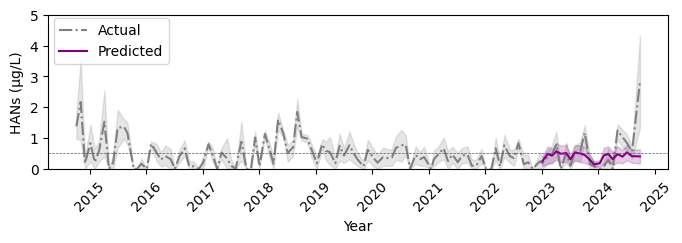

In [15]:
# Select features (independent variables) and target (dependent variable)
X1 = data.loc[:, ['month', 'year', 'tempW', 'pH', 'FreeCl', 'distance', 'COD']]
y1 = data['HANs']

# Create the training set with data before 2023
train_mask = data['year'] < 2023  # Use data before 2023 for training
X_train = X1[train_mask]
y_train = y1[train_mask]

# Create the test set with data for 2023 and 2024
test_mask = data['year'] >= 2023  # Use data from 2023 and 2024 for testing/prediction
X_test = X1[test_mask]
y_test = y1[test_mask]

# Optional: Reset the index if needed
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Initialize Random Forest Regressor
rf1 = RandomForestRegressor(n_estimators=100, random_state=2)

# Train the model with data before 2023
rf1.fit(X_train, y_train)

# Make predictions on the test set (2023 and 2024)
y_pred = rf1.predict(X_test)


# Create a DataFrame for the entire dataset with predictions for 2023 and 2024
plot_df = data.copy()
plot_df['Predicted'] = plot_df['HANs']  # Initialize with actual values
plot_df.loc[plot_df['year'] >= 2023, 'Predicted'] = y_pred  # Replace with predictions for 2023 and 2024

# Filter data to include only the years 2023 and 2024
plot_df_2023_2024 = plot_df[plot_df['year'] >= 2023]

# Plot the actual and predicted THMs values for 2023 and 2024 using line plots
plt.figure(figsize=(8, 2))

# Line plot for actual THMs values for 2023 and 2024
ax = sb.lineplot(data=data, x='date', y='HANs', color='grey', label='Actual',linestyle='-.')

# Line plot for predicted THMs values for 2023 and 2024
ax = sb.lineplot(data=plot_df_2023_2024, x='date', y='Predicted', color='purple', label='Predicted')

# Show legend with custom position
ax.legend(bbox_to_anchor=(0.195, 0.980), borderaxespad=0)

# Add axis labels and set limits
plt.xlabel('Year')
plt.ylabel('HANs (μg/L)')
plt.ylim(0, 5)

# Quantification limit
plt.axhline(y=0.5, color='teal', linestyle='--', label='y = 0.5', linewidth=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Calculate the R-squared, MSE, and MAE values for the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the performance metrics
print("Random Forest")
print(f'{r2:.3f}')
print(f'{mse:.3f}')
print(f'{mae:.3f}')

C:\Users\jija8\AppData\Local\Temp\ipykernel_35624\1060387713.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


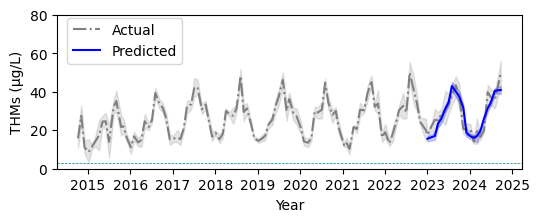

Adaboost
0.604
51.449
5.516


In [36]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Select features (independent variables) and target (dependent variable)
X1 = data.loc[:, ['month','year', 'tempW', 'pH', 'FreeCl', 'distance', 'COD']]
y1 = data['THMs']

# Create the training set with data before 2023
train_mask = data['year'] < 2023  # Use data before 2023 for training
X_train = X1[train_mask]
y_train = y1[train_mask]

# Create the test set with data for 2023 and 2024
test_mask = data['year'] >= 2023  # Use data from 2023 and 2024 for testing/prediction
X_test = X1[test_mask]
y_test = y1[test_mask]

# Initialize AdaBoost with a Decision Tree Regressor as the base learner
adaboost_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=4),
    n_estimators=100,
    random_state=42
)

# Train the model
adaboost_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = adaboost_model.predict(X_test)

# Calculate the R-squared, MSE, and MAE values for the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


# Create a DataFrame for the entire dataset with predictions for 2023 and 2024
plot_df = data.copy()
plot_df['Predicted'] = plot_df['THMs']  # Initialize with actual values
plot_df.loc[plot_df['year'] >= 2023, 'Predicted'] = y_pred  # Replace with predictions for 2023 and 2024

# Filter data to include only the years 2023 and 2024
plot_df_2023_2024 = plot_df[plot_df['year'] >= 2023]

# Plot the actual and predicted THMs values for 2023 and 2024 using line plots
plt.figure(figsize=(6, 2))
plt.rcParams.update({'font.size': 10})

# Line plot for actual THMs values for 2023 and 2024
ax = sb.lineplot(data=data, x='date', y='THMs', color='grey', label='Actual', linestyle='-.')

# Line plot for predicted THMs values for 2023 and 2024
ax = sb.lineplot(data=plot_df_2023_2024, x='date', y='Predicted', color='blue', label='Predicted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Show legend with custom position
ax.legend(bbox_to_anchor=(0.27, 0.980), borderaxespad=0)

# Add axis labels and set limits
plt.xlabel('Year')
plt.ylabel('THMs (μg/L)')
plt.ylim(0, 80)

# Add a horizontal line to indicate quantification limit
plt.axhline(y=3, color='teal', linestyle='--', label='y = 3', linewidth=0.5)

#plt.title('Actual vs Predicted THMs (2023-2024)')
plt.show()

print("Adaboost")
print(f'{r2:.3f}')
print(f'{mse:.3f}')
print(f'{mae:.3f}')

(0.0, 60.0)

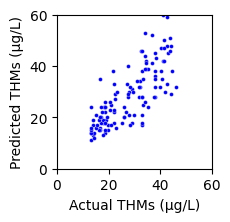

In [33]:
plt.figure(figsize=(2, 2))
sb.scatterplot(data=plot_df, x=plot_df_2023_2024['Predicted'], y=plot_df_2023_2024['THMs'], color='blue', s=8)
plt.xlabel('Actual THMs (μg/L)')
plt.ylabel('Predicted THMs (μg/L)')
plt.ylim(0, 60)
plt.xlim(0, 60)

    Feature  Importance
2        pH    0.057443
5       COD    0.107069
3    FreeCl    0.154020
4  distance    0.162921
0     month    0.244404
1     tempW    0.274142


C:\Users\jija8\AppData\Local\Temp\ipykernel_39148\2395403279.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues', orient='h')


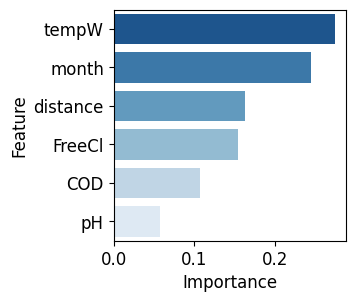

In [149]:
feature_importance_adaboost = adaboost_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X1.columns,
    'Importance': feature_importance_adaboost
}).sort_values(by='Importance', ascending=True)

print(importance_df)
plt.rcParams.update({'font.size': 12})

# Plot the feature importance
plt.figure(figsize=(3, 3))
sb.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues', orient='h')
plt.xlabel('Importance')
plt.ylabel('Feature')
#plt.title('THMs vs. Feature Importance')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


In [146]:
# Select features (independent variables) and target (dependent variable)
X1 = data.loc[:, ['month', 'tempW', 'pH', 'FreeCl', 'distance', 'COD']]
y1 = data['HAAs']

# Create the training set with data before 2023
train_mask = data['year'] < 2023  # Use data before 2023 for training
X_train = X1[train_mask]
y_train = y1[train_mask]

# Create the test set with data for 2023 and 2024
test_mask = data['year'] >= 2023  # Use data from 2023 and 2024 for testing/prediction
X_test = X1[test_mask]
y_test = y1[test_mask]

# Initialize AdaBoost with a Decision Tree Regressor as the base learner
adaboost_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=4),
    n_estimators=100,
    random_state=42
)

# Train the model
adaboost_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = adaboost_model.predict(X_test)

# Calculate the R-squared, MSE, and MAE values for the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print("Adaboost")
print(f'{r2:.3f}')
print(f'{mse:.3f}')
print(f'{mae:.3f}')

Adaboost
0.061
7.995
2.302


    Feature  Importance
2        pH    0.060339
3    FreeCl    0.129592
0     month    0.138907
5       COD    0.178922
1     tempW    0.225530
4  distance    0.266710


C:\Users\jija8\AppData\Local\Temp\ipykernel_39148\2441801725.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues', orient='h')


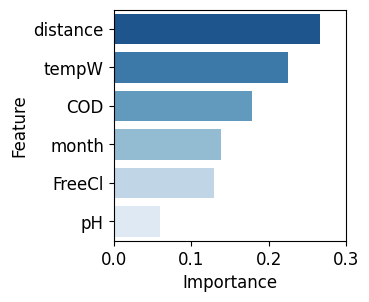

In [147]:
feature_importance_adaboost = adaboost_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X1.columns,
    'Importance': feature_importance_adaboost
}).sort_values(by='Importance', ascending=True)

print(importance_df)
plt.rcParams.update({'font.size': 12})

# Plot the feature importance
plt.figure(figsize=(3, 3))
sb.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues', orient='h')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xlim(0, 0.3)

#plt.title('THMs vs. Feature Importance')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


C:\Users\jija8\AppData\Local\Temp\ipykernel_35624\2710752307.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


[Text(16071.0, 0, '2014'),
 Text(16436.0, 0, '2015'),
 Text(16801.0, 0, '2016'),
 Text(17167.0, 0, '2017'),
 Text(17532.0, 0, '2018'),
 Text(17897.0, 0, '2019'),
 Text(18262.0, 0, '2020'),
 Text(18628.0, 0, '2021'),
 Text(18993.0, 0, '2022'),
 Text(19358.0, 0, '2023'),
 Text(19723.0, 0, '2024'),
 Text(20089.0, 0, '2025')]

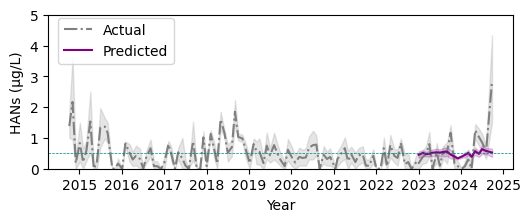

In [38]:
# Select features (independent variables) and target (dependent variable)
X1 = data.loc[:, ['month', 'year', 'tempW', 'pH', 'FreeCl', 'distance', 'COD']]
y1 = data['HANs']

# Create the training set with data before 2023
train_mask = data['year'] < 2023  # Use data before 2023 for training
X_train = X1[train_mask]
y_train = y1[train_mask]

# Create the test set with data for 2023 and 2024
test_mask = data['year'] >= 2023  # Use data from 2023 and 2024 for testing/prediction
X_test = X1[test_mask]
y_test = y1[test_mask]

# Initialize AdaBoost with a Decision Tree Regressor as the base learner
adaboost_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=4),
    n_estimators=100,
    random_state=42
)

# Train the model
adaboost_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = adaboost_model.predict(X_test)

# Create a DataFrame for the entire dataset with predictions for 2023 and 2024
plot_df = data.copy()
plot_df['Predicted'] = plot_df['HANs']  # Initialize with actual values
plot_df.loc[plot_df['year'] >= 2023, 'Predicted'] = y_pred  # Replace with predictions for 2023 and 2024

# Filter data to include only the years 2023 and 2024
plot_df_2023_2024 = plot_df[plot_df['year'] >= 2023]

# Plot the actual and predicted THMs values for 2023 and 2024 using line plots
plt.figure(figsize=(6, 2))

# Line plot for actual THMs values for 2023 and 2024
ax = sb.lineplot(data=data, x='date', y='HANs', color='grey', label='Actual',  linestyle='-.')

# Line plot for predicted THMs values for 2023 and 2024
ax = sb.lineplot(data=plot_df_2023_2024, x='date', y='Predicted', color='purple', label='Predicted')

# Show legend with custom position
ax.legend(bbox_to_anchor=(0.27, 0.980), borderaxespad=0)

# Add axis labels and set limits
plt.xlabel('Year')
plt.ylabel('HANs (μg/L)')
plt.ylim(0, 5)

# Quantification limit
plt.axhline(y=0.5, color='teal', linestyle='--', label='y = 0.5', linewidth=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

(0.0, 5.0)

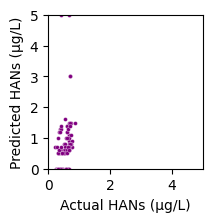

In [43]:
plt.figure(figsize=(2, 2))
sb.scatterplot(data=plot_df, x=plot_df_2023_2024['Predicted'], y=plot_df_2023_2024['HANs'], color='purple', s=8)
plt.xlabel('Actual HANs (μg/L)')
plt.ylabel('Predicted HANs (μg/L)')
plt.ylim(0, 5)
plt.xlim(0, 5)

In [154]:
from sklearn.ensemble import GradientBoostingRegressor

X1 = data.loc[:, ['month', 'tempW', 'pH', 'FreeCl', 'distance', 'COD']]
y1 = data['THMs']

# Create the training set with data before 2023
train_mask = data['year'] < 2023  # Use data before 2023 for training
X_train = X1[train_mask]
y_train = y1[train_mask]

# Create the test set with data for 2023 and 2024
test_mask = data['year'] >= 2023  # Use data from 2023 and 2024 for testing/prediction
X_test = X1[test_mask]
y_test = y1[test_mask]

# Initialize Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(
    n_estimators=200, 
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42
)

# Train the model
gbr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = gbr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Grad Boost")
print(f'{r2:.3f}')
print(f'{mse:.3f}')
print(f'{mae:.3f}')

Grad Boost
0.433
73.701
6.686


In [153]:
from catboost import CatBoostRegressor

# Select features (independent variables) and target (dependent variable)
X1 = data.loc[:, ['month', 'tempW', 'pH', 'FreeCl', 'distance', 'COD']]
y1 = data['THMs']

# Create the training set with data before 2023
train_mask = data['year'] < 2023  # Use data before 2023 for training
X_train = X1[train_mask]
y_train = y1[train_mask]

# Create the test set with data for 2023 and 2024
test_mask = data['year'] >= 2023  # Use data from 2023 and 2024 for testing/prediction
X_test = X1[test_mask]
y_test = y1[test_mask]

# Initialize CatBoostRegressor
catboost_model = CatBoostRegressor(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=False
)

# Train the model
catboost_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = catboost_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print("Catboost")
print(f'{r2:.3f}')
print(f'{mse:.3f}')
print(f'{mae:.3f}')

Catboost
0.432
73.719
6.722


C:\Users\jija8\AppData\Local\Temp\ipykernel_35624\2391857272.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


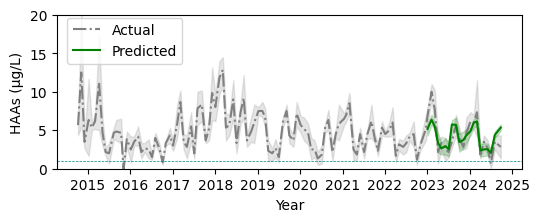

Catboost
0.499
4.268
1.488


In [44]:
from catboost import CatBoostRegressor

# Select features (independent variables) and target (dependent variable)
X1 = data.loc[:, ['month', 'year', 'tempW', 'pH', 'FreeCl', 'distance', 'COD']]
y1 = data['HAAs']

# Create the training set with data before 2023
train_mask = data['year'] < 2023  # Use data before 2023 for training
X_train = X1[train_mask]
y_train = y1[train_mask]

# Create the test set with data for 2023 and 2024
test_mask = data['year'] >= 2023  # Use data from 2023 and 2024 for testing/prediction
X_test = X1[test_mask]
y_test = y1[test_mask]

# Initialize CatBoostRegressor
catboost_model = CatBoostRegressor(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=False
)

# Train the model
catboost_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = catboost_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# Create a DataFrame for the entire dataset with predictions for 2023 and 2024
plot_df = data.copy()
plot_df['Predicted'] = plot_df['HAAs']  # Initialize with actual values
plot_df.loc[plot_df['year'] >= 2023, 'Predicted'] = y_pred  # Replace with predictions for 2023 and 2024

# Filter data to include only the years 2023 and 2024
plot_df_2023_2024 = plot_df[plot_df['year'] >= 2023]

# Plot the actual and predicted THMs values for 2023 and 2024 using line plots
plt.figure(figsize=(6, 2))

# Line plot for actual THMs values for 2023 and 2024
ax = sb.lineplot(data=data, x='date', y='HAAs', color='grey', label='Actual', linestyle='-.')

# Line plot for predicted THMs values for 2023 and 2024
ax = sb.lineplot(data=plot_df_2023_2024, x='date', y='Predicted', color='green', label='Predicted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Show legend with custom position
ax.legend(bbox_to_anchor=(0.27, 0.980), borderaxespad=0)

# Add axis labels and set limits
plt.xlabel('Year')
plt.ylabel('HAAs (μg/L)')
plt.ylim(0, 20)

# Add a horizontal line to indicate quantification limit
plt.axhline(y=1, color='teal', linestyle='--', label='y = 1', linewidth=0.5)

#plt.title('Actual vs Predicted THMs (2023-2024)')
plt.show()

print("Catboost")
print(f'{r2:.3f}')
print(f'{mse:.3f}')
print(f'{mae:.3f}')

(0.0, 15.0)

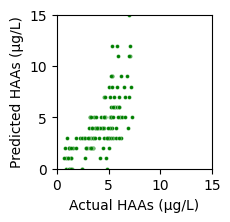

In [29]:
plt.figure(figsize=(2, 2))
sb.scatterplot(data=plot_df, x=plot_df_2023_2024['Predicted'], y=plot_df_2023_2024['HAAs'], color='green', s=8)
plt.xlabel('Actual HAAs (μg/L)')
plt.ylabel('Predicted HAAs (μg/L)')
plt.ylim(0, 15)
plt.xlim(0, 15)

    Feature  Importance
3        pH    3.678943
4    FreeCl    4.735367
6       COD   11.774651
2     tempW   12.843366
5  distance   15.593513
0     month   22.645238
1      year   28.728922


C:\Users\jija8\AppData\Local\Temp\ipykernel_39148\2672634459.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Importance', y='Feature', data=importance_df, palette='Greens', orient='h')


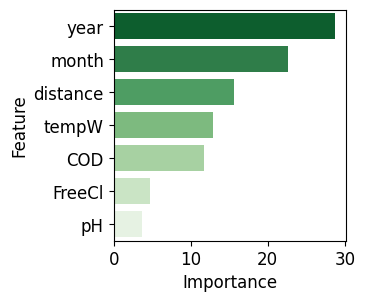

In [115]:
feature_importance = catboost_model.get_feature_importance()
features = X1.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=True)

print(importance_df)

plt.rcParams.update({'font.size': 12})

# Plot the feature importance
plt.figure(figsize=(3, 3))
sb.barplot(x='Importance', y='Feature', data=importance_df, palette='Greens', orient='h')
plt.xlabel('Importance')
plt.ylabel('Feature')
#plt.title('THMs vs. Feature Importance')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


C:\Users\jija8\AppData\Local\Temp\ipykernel_35624\1713570686.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


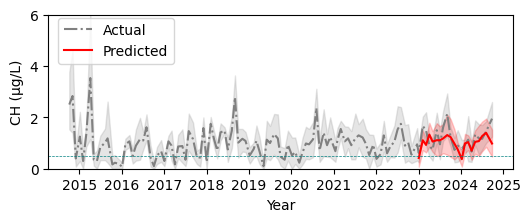

Catboost
0.529
0.294
0.420


In [45]:
from catboost import CatBoostRegressor

# Select features (independent variables) and target (dependent variable)
X1 = data.loc[:, ['month', 'year', 'tempW', 'pH', 'FreeCl', 'distance', 'COD']]
y1 = data['CH']

# Create the training set with data before 2023
train_mask = data['year'] < 2023  # Use data before 2023 for training
X_train = X1[train_mask]
y_train = y1[train_mask]

# Create the test set with data for 2023 and 2024
test_mask = data['year'] >= 2023  # Use data from 2023 and 2024 for testing/prediction
X_test = X1[test_mask]
y_test = y1[test_mask]

# Initialize CatBoostRegressor
catboost_model = CatBoostRegressor(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=False
)

# Train the model
catboost_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = catboost_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# Create a DataFrame for the entire dataset with predictions for 2023 and 2024
plot_df = data.copy()
plot_df['Predicted'] = plot_df['CH']  # Initialize with actual values
plot_df.loc[plot_df['year'] >= 2023, 'Predicted'] = y_pred  # Replace with predictions for 2023 and 2024

# Filter data to include only the years 2023 and 2024
plot_df_2023_2024 = plot_df[plot_df['year'] >= 2023]

# Plot the actual and predicted THMs values for 2023 and 2024 using line plots
plt.figure(figsize=(6, 2))

# Line plot for actual THMs values for 2023 and 2024
ax = sb.lineplot(data=data, x='date', y='CH', color='grey', label='Actual', linestyle='-.')

# Line plot for predicted THMs values for 2023 and 2024
ax = sb.lineplot(data=plot_df_2023_2024, x='date', y='Predicted', color='red', label='Predicted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Show legend with custom position
ax.legend(bbox_to_anchor=(0.27, 0.980), borderaxespad=0)

# Add axis labels and set limits
plt.xlabel('Year')
plt.ylabel('CH (μg/L)')
plt.ylim(0, 6)

# Add a horizontal line to indicate quantification limit
plt.axhline(y=0.5, color='teal', linestyle='--', label='y = 1', linewidth=0.5)

#plt.title('Actual vs Predicted THMs (2023-2024)')
plt.show()

print("Catboost")
print(f'{r2:.3f}')
print(f'{mse:.3f}')
print(f'{mae:.3f}')

(0.0, 4.0)

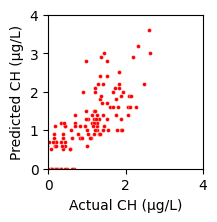

In [24]:
plt.figure(figsize=(2, 2))
sb.scatterplot(data=plot_df, x=plot_df_2023_2024['Predicted'], y=plot_df_2023_2024['CH'], color='red', s=8)
plt.xlabel('Actual CH (μg/L)')
plt.ylabel('Predicted CH (μg/L)')
plt.ylim(0, 4)
plt.xlim(0, 4)

    Feature  Importance
1      year   20.625756
5  distance   19.923868
0     month   15.865629
2     tempW   15.119686
4    FreeCl   13.870231
6       COD   11.075046
3        pH    3.519784


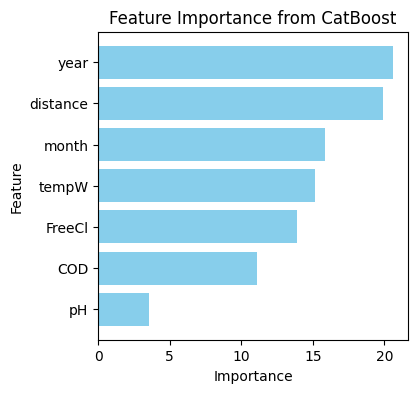

In [97]:
# Feature importance from CatBoost
feature_importance = catboost_model.get_feature_importance()
features = X1.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot the feature importance
plt.figure(figsize=(4, 4))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from CatBoost')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


In [73]:
from sklearn.neural_network import MLPRegressor

# Initialize the neural network
nn_model = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the model
nn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = nn_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MLP")
print(f'{r2:.3f}')
print(f'{mse:.3f}')
print(f'{mae:.3f}')

MLP
0.249
0.469
0.538


In [74]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Deci Tree")
print(f'{r2:.3f}')
print(f'{mse:.3f}')
print(f'{mae:.3f}')

Deci Tree
0.334
0.416
0.493
